## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [405]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import OrderedDict


In [407]:
# your code here
#model1 = nn.Sequential(OrderedDict([
#    ('hidden', nn.
#]))
model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 4)),
    ('activation', nn.ReLU()),
    ('output', nn.Linear(4, 2)),
    ('sigmoid', nn.Sigmoid())
]))

In [409]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (activation): ReLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [411]:
# your code here
#data_in = torch.tensor( ...
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [413]:
# your code here
# data_target = torch.tensor( ...
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [415]:
# your code here
# criterion = 
# optimizer = 
criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.1)

In [417]:
# your code here
# Train the model
epochs = 1000
losses = []

for epoch in range(epochs):
    output = model1(data_in)
    loss = criterion(output, data_target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

Epoch 0/1000, Loss: 0.7577531933784485
Epoch 100/1000, Loss: 0.6443262100219727
Epoch 200/1000, Loss: 0.630070149898529
Epoch 300/1000, Loss: 0.6156925559043884
Epoch 400/1000, Loss: 0.5827895402908325
Epoch 500/1000, Loss: 0.5181186199188232
Epoch 600/1000, Loss: 0.42639949917793274
Epoch 700/1000, Loss: 0.3503763973712921
Epoch 800/1000, Loss: 0.3120371997356415
Epoch 900/1000, Loss: 0.29158374667167664


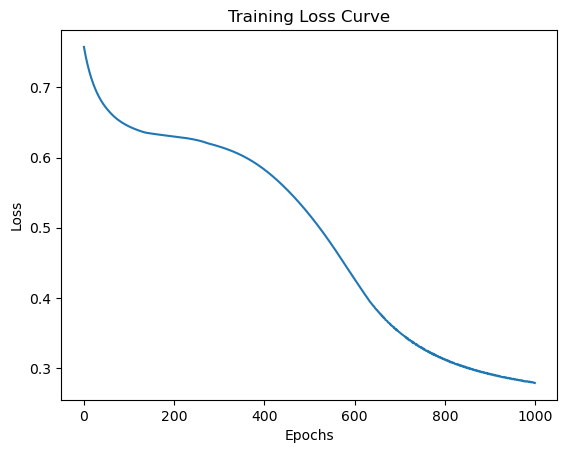

In [418]:
# your code here
# visualize the resuts
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [421]:
# your code here
# print model wights
for name, param in model1.named_parameters():
    print(f"{name}: {param.data}")

hidden.weight: tensor([[ 1.9643,  1.9636],
        [-0.3179, -0.0839],
        [-0.6780, -0.2797],
        [-0.4721, -0.2659]])
hidden.bias: tensor([-1.9795e+00, -6.6435e-02, -6.1195e-01, -1.3033e-03])
output.weight: tensor([[ 2.8240, -0.1713, -0.0694,  0.2849],
        [-1.8430, -0.4932,  0.1488,  0.2650]])
output.bias: tensor([-2.5889,  0.5732])


In [423]:
def accuracy_model(model, X, y):
    with torch.no_grad():
        output = model(X)
        predicted = (output > 0.5).float()
        correct = (predicted == y).float()
        accuracy = correct.sum()/correct.numel()
        return accuracy

accuracy = accuracy_model(model1, data_in, data_target)
print(f"Accuracy of model1: {accuracy:.4f}")

Accuracy of model1: 0.8750


Epoch 0/1000, Loss: 0.7003923058509827
Epoch 100/1000, Loss: 0.5589823722839355
Epoch 200/1000, Loss: 0.40114864706993103
Epoch 300/1000, Loss: 0.26288533210754395
Epoch 400/1000, Loss: 0.2353632152080536
Epoch 500/1000, Loss: 0.1763085424900055
Epoch 600/1000, Loss: 0.08206925541162491
Epoch 700/1000, Loss: 0.05061019957065582
Epoch 800/1000, Loss: 0.03564736992120743
Epoch 900/1000, Loss: 0.02734312415122986


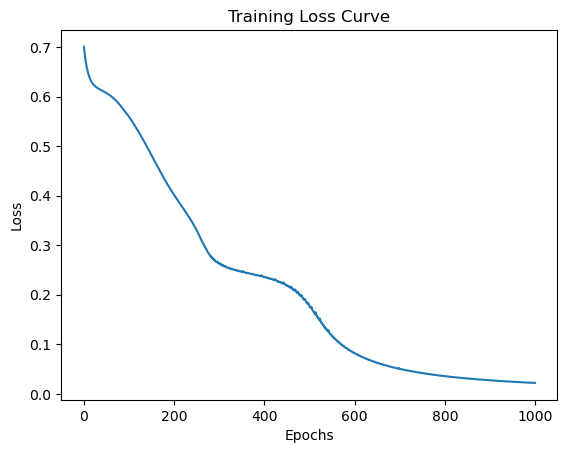

hidden1.weight: tensor([[-1.2290, -0.2393],
        [ 1.3935,  1.6147],
        [ 0.9123,  1.7963]])
hidden1.bias: tensor([ 1.8780, -0.3286, -0.2952])
hidden2.weight: tensor([[-1.5455,  1.3397,  1.3613],
        [ 1.6962, -1.6510, -1.4400]])
hidden2.bias: tensor([-1.3021,  2.0393])
output.weight: tensor([[ 1.8291, -2.9957],
        [-1.9010, -1.5770]])
output.bias: tensor([-2.1592,  3.6588])
Accuracy of model2: 1.0000


In [425]:
model2 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 3)),
    ('activation1', nn.ReLU()),
    ('hidden2', nn.Linear(3, 2)),
    ('activation2', nn.LeakyReLU()),
    ('output', nn.Linear(2, 2)),
    ('sigmoid', nn.Sigmoid())
]))

data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)

criterion = nn.BCELoss()
optimizer = optim.SGD(model2.parameters(), lr=0.2)

epochs = 1000
losses = []

for epoch in range(epochs):
    output = model2(data_in)
    loss = criterion(output, data_target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

for name, param in model2.named_parameters():
    print(f"{name}: {param.data}")

def accuracy_model(model, X, y):
    with torch.no_grad():
        output = model(X)
        predicted = (output > 0.5).float()
        correct = (predicted == y).float()
        accuracy = correct.sum()/correct.numel()
        return accuracy

accuracy = accuracy_model(model2, data_in, data_target)
print(f"Accuracy of model2: {accuracy:.4f}")

Epoch 0/1000, Loss: 0.7253785729408264
Epoch 100/1000, Loss: 1.8668426093881862e-07
Epoch 200/1000, Loss: 1.6697764237960655e-07
Epoch 300/1000, Loss: 1.6440425554264948e-07
Epoch 400/1000, Loss: 1.613737481420685e-07
Epoch 500/1000, Loss: 1.5796962316017016e-07
Epoch 600/1000, Loss: 1.5426039112753642e-07
Epoch 700/1000, Loss: 1.5029986855097377e-07
Epoch 800/1000, Loss: 1.461367702404459e-07
Epoch 900/1000, Loss: 1.4181416929659463e-07


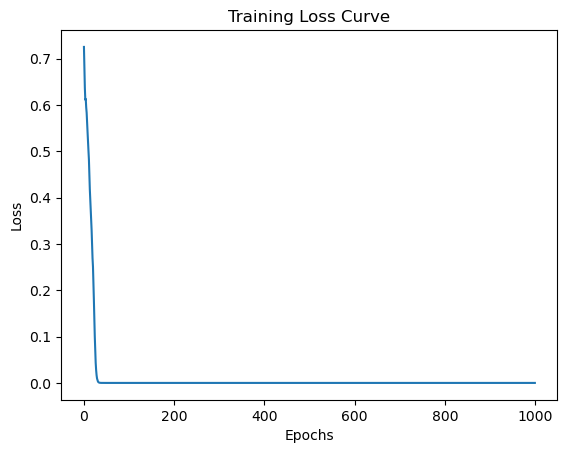

hidden1.weight: tensor([[ 0.1038, -0.5253],
        [-0.8331, -0.9438],
        [ 0.9965,  1.4045],
        [ 1.4158,  1.2454],
        [ 0.5203, -0.0754]])
hidden1.bias: tensor([-1.1742e-01,  1.9349e+00,  8.3992e-04,  2.2241e-01, -1.0225e+00])
hidden2.weight: tensor([[ 0.0810,  0.0258, -3.4046, -3.2820, -0.4470],
        [-0.2207,  2.3738, -0.2660, -0.4609,  0.6520],
        [-0.3675, -0.6176, -3.2473, -3.1568, -0.1621],
        [ 0.2225,  2.8427, -1.8441, -1.5701, -0.4296],
        [-0.2236,  2.1483, -0.7811, -1.3447, -0.9475],
        [-0.0215,  2.5590, -0.0625, -0.9744, -0.8075],
        [ 0.1547, -1.3729, -0.7135, -0.4321, -0.6467],
        [ 0.2692, -1.2941, -2.4723, -2.6528, -0.4432]])
hidden2.bias: tensor([-3.0676,  1.5599, -2.9828,  0.7741,  0.5723,  1.0122, -1.0729, -3.1813])
hidden3.weight: tensor([[ 3.2452, -0.6114,  2.3339,  2.9283,  1.8444,  0.6529,  1.4335,  2.1466],
        [ 0.8105, -0.7702,  0.6964, -0.5413,  0.5103,  0.5637,  0.3952,  0.6896],
        [ 0.2920, -0.29

In [426]:
model3 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 5)),
    ('activation1', nn.ReLU()),
    ('hidden2', nn.Linear(5, 8)),
    ('activation2', nn.LeakyReLU()),
    ('hidden3', nn.Linear(8, 10)),
    ('activation3', nn.ReLU()),
    ('output', nn.Linear(10, 2)),
    ('sigmoid', nn.Sigmoid())
]))

data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)

criterion = nn.BCELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.1)

epochs = 1000
losses = []

for epoch in range(epochs):
    output = model3(data_in)
    loss = criterion(output, data_target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

for name, param in model3.named_parameters():
    print(f"{name}: {param.data}")

def accuracy_model(model, X, y):
    with torch.no_grad():
        output = model(X)
        predicted = (output > 0.5).float()
        correct = (predicted == y).float()
        accuracy = correct.sum()/correct.numel()
        return accuracy

accuracy = accuracy_model(model3, data_in, data_target)
print(f"Accuracy of model2: {accuracy:.4f}")